In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"D:\Codebook\student_performence\Student_Performance.csv")
df


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,mobile_uses
0,7,99,Yes,9,1,91.0,0.0
1,4,82,No,4,2,65.0,2.0
2,8,51,Yes,7,2,45.0,2.0
3,5,52,Yes,5,2,36.0,3.0
4,7,75,No,8,5,66.0,2.0
...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0,3.0
9996,7,64,Yes,8,5,58.0,2.0
9997,6,83,Yes,8,5,74.0,1.0
9998,9,97,Yes,7,0,95.0,0.0


In [3]:
df.shape


(10000, 7)

mobile uses 
* 0 hour - 91-100
* 1 hour - 70-90
* 2 hour - 40-69
* 3 hour - 1-39

In [4]:
# import numpy as np

# conditions = [
#     (df['Performance Index'] >= 90.0),
#     (df['Performance Index'] >= 70.0) & (df['Performance Index'] <= 89.0),
#     (df['Performance Index'] >= 40.0) & (df['Performance Index'] <= 69.0),
#     (df['Performance Index'] >= 1.0) & (df['Performance Index'] <= 39.0)
# ]

# values = [0, 1, 2, 3]

# df['mobile_uses'] = np.select(conditions, values, default=np.nan)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
 6   mobile_uses                       10000 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 547.0+ KB


In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,mobile_uses
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800,1.945800
std,2.589309,17.343152,1.695863,2.867348,19.212558,0.762706
min,1.000000,40.000000,4.000000,0.000000,10.000000,0.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000,1.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000,2.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000,2.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000,3.000000


In [7]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
mobile_uses                         0
dtype: int64

# checking imbalance

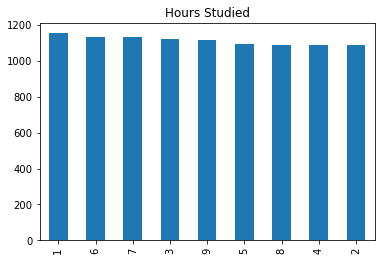

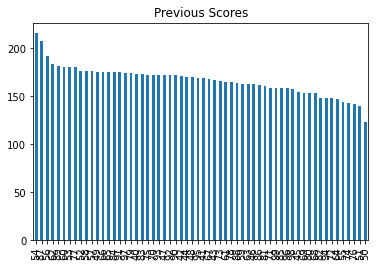

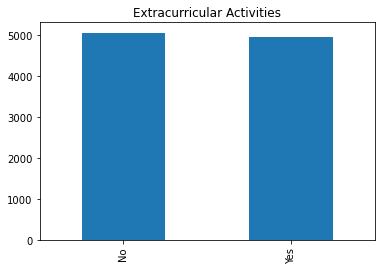

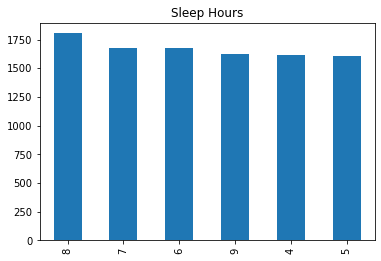

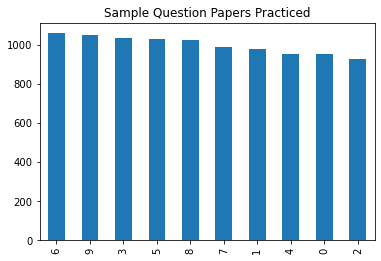

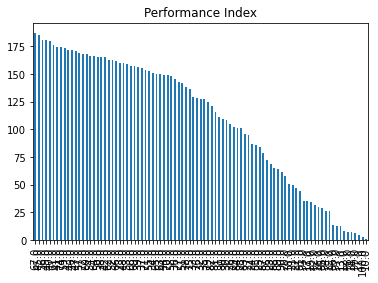

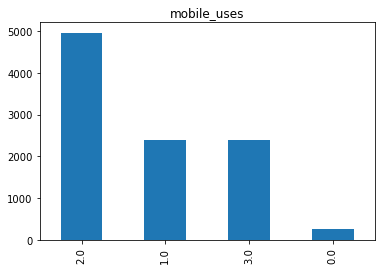

In [8]:
for feature in df.columns:
    df[feature].value_counts().plot.bar()
    plt.title(feature)
    plt.show()

# checking outliers 

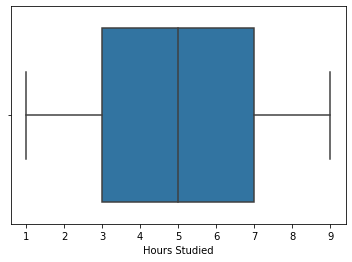

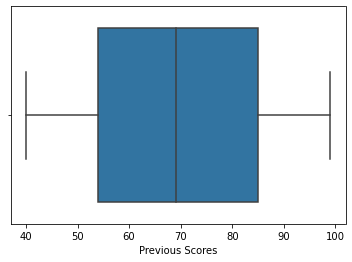

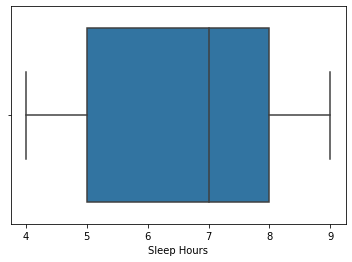

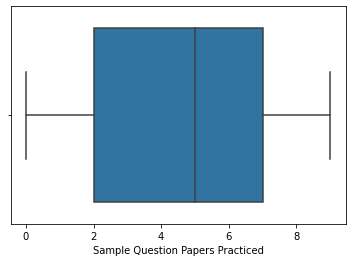

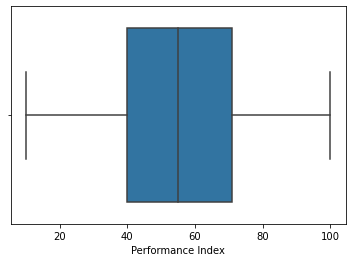

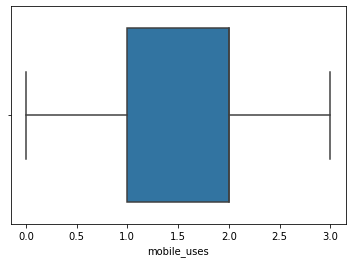

In [9]:
for feature in df.select_dtypes(include='number'):
    sns.boxplot(x=feature, data = df)
    plt.show()

# checking skewness

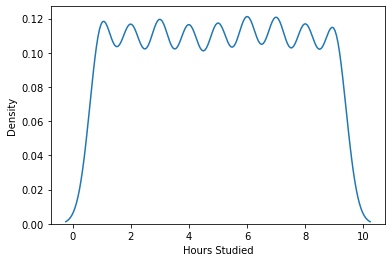

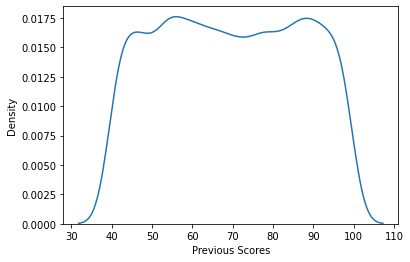

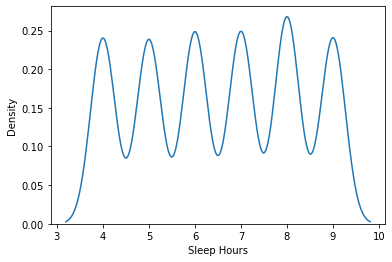

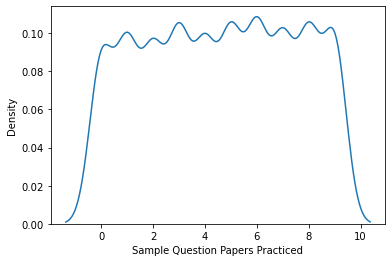

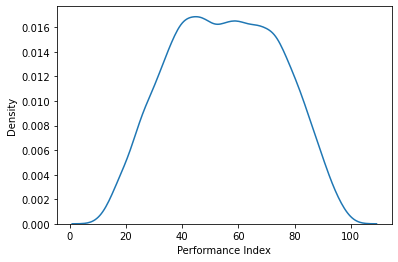

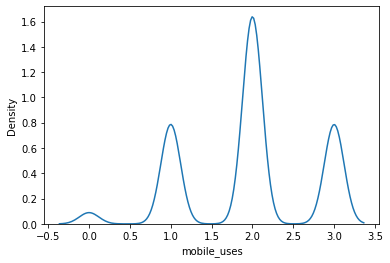

In [10]:
for feature in df.select_dtypes(include='number'):
    sns.kdeplot(x=feature, data=df)
    plt.show()

<AxesSubplot:>

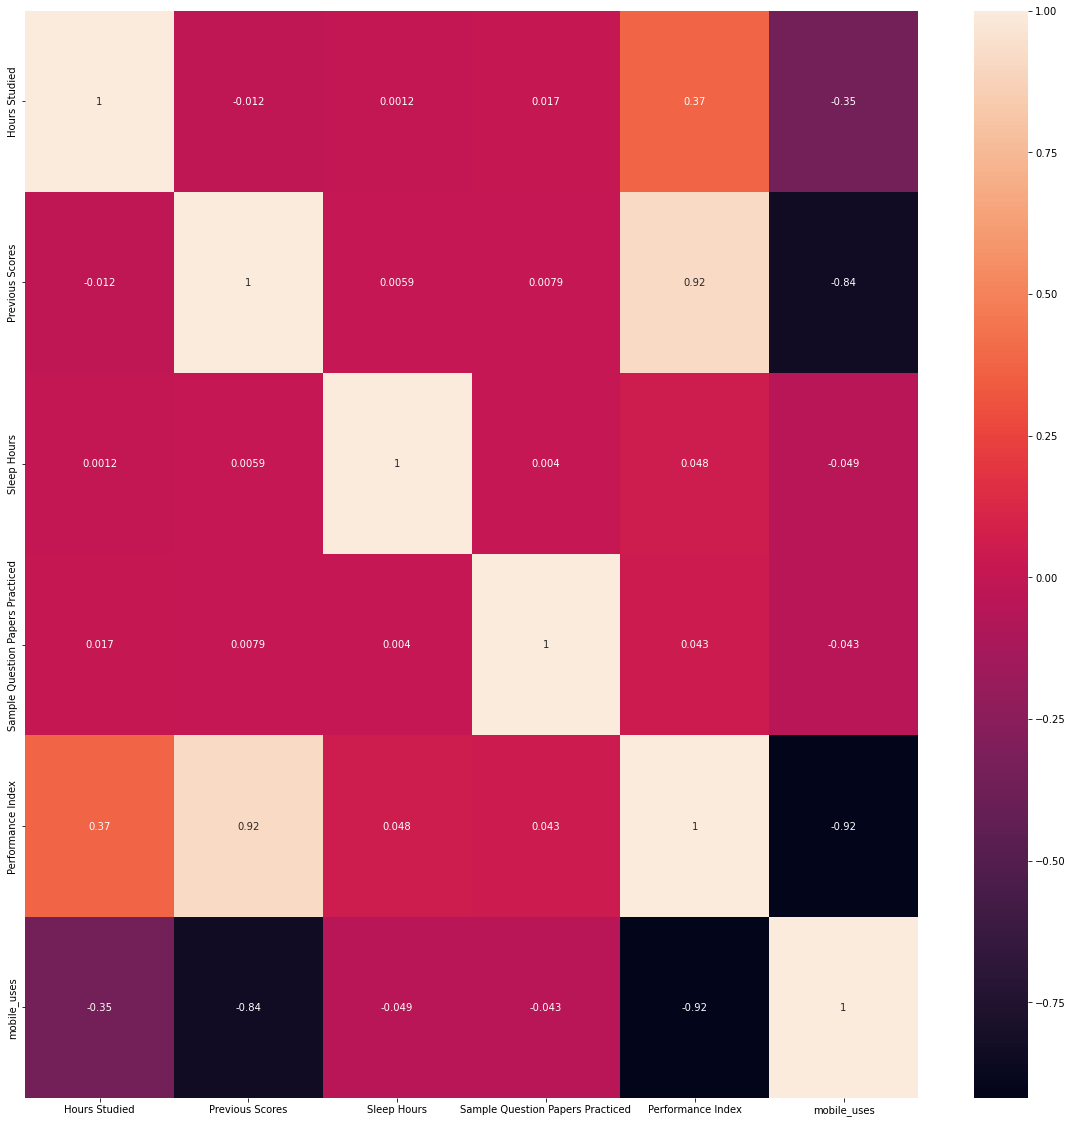

In [11]:
plt.figure(figsize=(20,20))
correlation = df.corr()
sns.heatmap(correlation, annot=True)

# encoding

In [12]:
for feature in df.select_dtypes(include='object'):
    df[feature] = df[feature].astype('category')
    df[feature] = df[feature].cat.codes

In [13]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,mobile_uses
0,7,99,1,9,1,91.0,0.0
1,4,82,0,4,2,65.0,2.0
2,8,51,1,7,2,45.0,2.0
3,5,52,1,5,2,36.0,3.0
4,7,75,0,8,5,66.0,2.0
...,...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0,3.0
9996,7,64,1,8,5,58.0,2.0
9997,6,83,1,8,5,74.0,1.0
9998,9,97,1,7,0,95.0,0.0


In [14]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor 
import warnings

In [15]:
X = df.drop('Performance Index',axis=1)
y=df['Performance Index']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((8000, 6), (2000, 6))

In [16]:
X_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,mobile_uses
6252,5,69,0,8,2,2.0
4684,2,46,1,4,8,3.0
1731,7,56,1,7,5,2.0
4742,6,42,1,8,5,3.0
4521,7,53,0,4,6,2.0
...,...,...,...,...,...,...
6412,2,70,0,7,3,2.0
8285,4,79,0,9,3,2.0
7853,2,40,1,7,2,3.0
1095,3,83,0,7,5,2.0


In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [18]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

# Assuming you have already defined the necessary functions 'evaluate_model' and imported the required libraries.

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)
    print('=' * 35)
    print('\n')

# Print the results for all models outside the loop
print("All Models:")
for model_name, r2_score in zip(model_list, r2_list):
    print(f"{model_name}: R2 Score: {r2_score:.4f}")


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1.9783
- Mean Squared Error: 3.9138
- Mean Absolute Error: 1.5728
- R2 Score: 0.9894
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.9768
- Mean Squared Error: 3.9079
- Mean Absolute Error: 1.5758
- R2 Score: 0.9895


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.2082
- Mean Squared Error: 4.8759
- Mean Absolute Error: 1.7562
- R2 Score: 0.9868
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.2085
- Mean Squared Error: 4.8776
- Mean Absolute Error: 1.7527
- R2 Score: 0.9868


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1.9428
- Mean Squared Error: 3.7744
- Mean Absolute Error: 1.5471
- R2 Score: 0.9898
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.3596
- Mean Squared Error: 5.5676
- Mean Absolute Error: 1

In [19]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, r2_score

# Define hyperparameter ranges for each model
param_grid = {
    "Linear Regression": {},
    "Lasso": {"alpha": [1]},
    "K-Neighbors Regressor": {"n_neighbors": [3, 5, 7]},
    "Decision Tree": {"max_depth": [3, 5, 7], 'criterion': ['mse', 'friedman_mse', 'mae', 'poisson']},
    "Random Forest Regressor": {'n_estimators': [8, 16, 32, 64, 128], "max_depth": [3, 5, 7]},
    "Gradient Boosting": {'learning_rate': [0.1, 0.01, 0.05, 0.001], 'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
                          'n_estimators': [8, 16, 32, 64, 128, 256]},
    "XGBRegressor": {'max_depth': [6, 8, 10], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [30, 50, 100]},
    "AdaBoost Regressor": {'learning_rate': [0.1, 0.01, 0.5, 0.001], 'n_estimators': [8, 16, 32, 64]}
}

model_list = []
r2_list = []

for model_name, model in models.items():
    # Create a scorer object to use in grid search
    scorer = make_scorer(r2_score)

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(
        model,
        param_grid[model_name],
        scoring=scorer,
        cv=5,
        n_jobs=-1
    )

    # Train the model with the best hyperparameters
    grid_search.fit(X_train, y_train)
    # Make predictions
    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_test)
    # Evaluate Train and Test dataset model_train_mae, model_train_mse, model_train_rmse,
    model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    print(model_name)
    model_list.append(model_name)
    print('Best hyperparameters:', grid_search.best_params_)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2) for model_train_r2 in r2_list)
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2) for model_test_r2 in r2_list)

    r2_list.append(model_test_r2)
    print('=' * 35)
    print('\n')

# Print the results for all models outside the loop
print("All Models:")
for model_name, r2_score in zip(model_list, r2_list):
    print(f"{model_name}: R2 Score: {r2_score:.4f}")


Linear Regression
Best hyperparameters: {}
Model performance for Training set
- Root Mean Squared Error: 4.0901
- Mean Squared Error: 16.7287
- Mean Absolute Error: 3.3267
<generator object <genexpr> at 0x000002A99786CC10>
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.9768
- Mean Squared Error: 3.9079
- Mean Absolute Error: 1.5758
<generator object <genexpr> at 0x000002A99786CC10>


Lasso
Best hyperparameters: {'alpha': 1}
Model performance for Training set
- Root Mean Squared Error: 4.0901
- Mean Squared Error: 16.7287
- Mean Absolute Error: 3.3267
<generator object <genexpr> at 0x000002A99786C9E0>
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.2085
- Mean Squared Error: 4.8776
- Mean Absolute Error: 1.7527
<generator object <genexpr> at 0x000002A99786C9E0>


K-Neighbors Regressor
Best hyperparameters: {'n_neighbors': 7}
Model performance for Training set
- Root Mean Squared Error: 4.0901


In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
5,Gradient Boosting,0.989838
6,XGBRegressor,0.989612
0,Linear Regression,0.989455
1,Lasso,0.986838
4,Random Forest Regressor,0.986251
2,K-Neighbors Regressor,0.985570
3,Decision Tree,0.981584
7,AdaBoost Regressor,0.940687


# GradientBoostingRegressor

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

gbc = GradientBoostingRegressor(random_state=42, learning_rate=0.1, n_estimators=256, subsample=0.75)
gbc.fit(X_train, y_train)

print('*'*10)

# prediction
train_prediction= gbc.predict(X_train)
test_prediction= gbc.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(gbc,X,y,cv=5)
print('cv_score :',score.mean())

print('*'*10)

**********
**********
R2 for train data 0.9903154015836928
R2 for test data 0.9896766664335755
**********
RMSE for train data 1.889563346280541
RMSE for test data 1.9559329659321427
**********
cv_score : 0.989490359434013
**********


# XGBRegressor

In [22]:
from xgboost import XGBRegressor

Xgb = XGBRegressor(random_state=42, learning_rate=0.1, max_depth=6, n_estimators=100)
Xgb.fit(X_train, y_train)

print('*'*10)

# prediction
train_prediction= Xgb.predict(X_train)
test_prediction= Xgb.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(Xgb,X,y,cv=5)
print('cv_score :',score.mean())

print('*'*10)

**********
**********
R2 for train data 0.9918911889166255
R2 for test data 0.9896124900882721
**********
RMSE for train data 1.7290169018930317
RMSE for test data 1.962003202237153
**********
cv_score : 0.9893700326081702
**********


# KN regressor

In [23]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor( n_neighbors=7)
knr.fit(X_train, y_train)


print('*'*10)

# prediction
train_prediction= knr.predict(X_train)
test_prediction= knr.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(knr,X,y,cv=5)
print('cv_score :',score.mean())

print('*'*10)

**********
**********
R2 for train data 0.9889868449650648
R2 for test data 0.9855700891017932
**********
RMSE for train data 2.0150068364698934
RMSE for test data 2.312468422288536
**********
cv_score : 0.9851115881967752
**********


# random forest 

In [24]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42, max_depth=7, n_estimators=128)
rfr.fit(X_train, y_train)


print('*'*10)

# prediction
train_prediction= rfr.predict(X_train)
test_prediction= rfr.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfr,X,y,cv=5)
print('cv_score :',score.mean())

print('*'*10)

**********
**********
R2 for train data 0.9873278227725132
R2 for test data 0.9860914631451541
**********
RMSE for train data 2.1614553398836436
RMSE for test data 2.270307631961656
**********
cv_score : 0.9861202215461902
**********


# decision tree regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42, max_depth= 7)
dt.fit(X_train, y_train)

print('*'*10)

# prediction
train_prediction= dt.predict(X_train)
test_prediction= dt.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt,X,y,cv=5)
print('cv_score :',score.mean())

print('*'*10)

**********
**********
R2 for train data 0.9833037818409895
R2 for test data 0.9819212500823847
**********
RMSE for train data 2.4810167873039086
RMSE for test data 2.5883808907026093
**********
cv_score : 0.981639536504035
**********


# LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print('*'*10)

# prediction
train_prediction= lr.predict(X_train)
test_prediction= lr.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X,y,cv=5)
print('cv_score :',score.mean())

print('*'*10)

**********
**********
R2 for train data 0.9893840552915499
R2 for test data 0.9894548427274829
**********
RMSE for train data 1.9783356239865373
RMSE for test data 1.976835433483024
**********
cv_score : 0.9893848656934127
**********


In [27]:
test_res = y_test-test_prediction

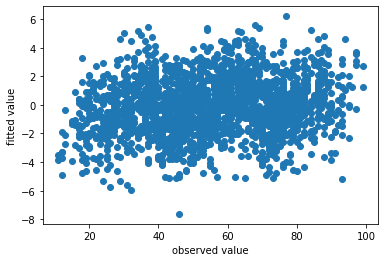

In [28]:
plt.scatter(y_test,test_res)
plt.xlabel('observed value')
plt.ylabel('fitted value')
plt.show()

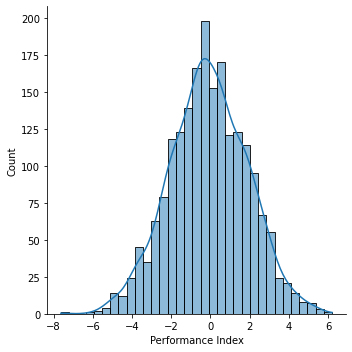

In [29]:
sns.displot(test_res,kde=True)
plt.show()

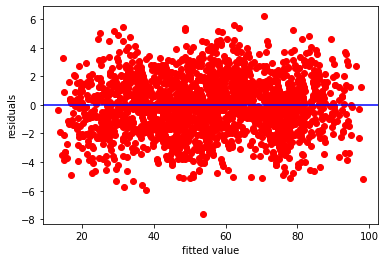

In [30]:
plt.scatter(test_prediction,test_res, c='r')
plt.axhline(y=0, color='blue')
plt.xlabel('fitted value')
plt.ylabel('residuals')
plt.show()

In [31]:
import statsmodels.formula.api as smf
model2= smf.ols('y~X',data=df).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.555e+05
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:08:46   Log-Likelihood:                -21009.
No. Observations:               10000   AIC:                         4.203e+04
Df Residuals:                    9993   BIC:                         4.208e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.8123      0.356    -72.544      0.000     -26.510     -25.115
X[0]           2.6835      0.010    261.548      0.000       2.663       2.704
X[1]           0.9600      0.003    366.113      0.000       0.955       0.965
X[2]           0.5717      0.040     14.430      0.000       0.494       0.649
X[3]           0.4496      0.012     38.307      0.000       0.427       0.473
X[4]           0.1814      0.007     26.219      0.000       0.168       0.195
X[5]          -1.5821      0.064    -24.761      0.000      -1.707      -1.457
==============================================================================
Omnibus:                        4.876   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                5.097
Skew:                           0.025   Prob(JB):                       0.0782
Kurtosis:                       3.099   Cond. No.                     1.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# use model to make prediction on a new value

lr.predict([[4,69,0,8,2,2]])

array([51.985616])

In [1]:
model=lr()
model.fit(X_train,y_train)
# Saving model to disk
from pickle import dump
dump(model,open('linear.pkl','wb'))

NameError: name 'lr' is not defined